[![xtensor](Amego_banner.png)](https://asd.gsfc.nasa.gov/amego/)


You can find MEGAlib basic documentation here: http://megalibtoolkit.com/home.html

In [1]:
import os
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from ipywidgets import Layout, interactive

from gwidgets import SelectFilesButton
from gParsing import SimFileParser_general, SimFileParser_events
from gParsing import DetectorIDdict

# Upload your .sim file 

Browse the simulated file (.sim file by cosima run):

In [2]:
browse_file = SelectFilesButton()
browse_file

SelectFilesButton(description='Select Files', icon='square-o', style=ButtonStyle(button_color='gray'))

TraitError: The 'files' trait of a SelectFilesButton instance must be a list, but a value of class 'str' (i.e. '') was specified.

In [3]:
sim_file = browse_file.files[0]
sim_file

'/Users/isabellabrewer/astropix/AtlasPix/cd_lines_high_n.inc1.id1.sim'

## Access the simulation main infos

In [4]:
general_infos = SimFileParser_general(sim_file)
df_general = pd.DataFrame(general_infos)

Here is your dataframe:

In [5]:
df_general[['Version', 'Geometry','Date', 'MEGAlib']]

,Version,Geometry,Date,MEGAlib
0,25,AtlasPix.geo.setup,2020-02-21,2.34.01
1,,,14:27:32,
2,,,,
3,,,,
4,,,,
5,,,,
6,,,,
7,,,,


In [6]:
df_general[['Seed', 'SimulationStartAreaFarField','BeamType','SpectralType','TB','TE','TS']]

,Seed,SimulationStartAreaFarField,BeamType,SpectralType,TB,TE,TS
0,1582313252,0.0,Point,Mono,0,12.082,290601490
1,,,,,,,
2,,,,,,,
3,,,,,,,
4,,,,,,,
5,,,,,,,
6,,,,,,,
7,,,,,,,


# Plotting

## Load simulated events with pandas

In [7]:
sim_events, hit_info = SimFileParser_events(sim_file)
df_events = pd.DataFrame(sim_events).T
#df_events

// ------------------------------- //
// Number of triggers found: 100000  //
// ------------------------------- //


In [7]:
sim_events, hit_info = SimFileParser_events(sim_file)
df_hits = pd.DataFrame(hit_info)
df_hits

// ------------------------------- //
// Number of triggers found: 100000  //
// ------------------------------- //


,DetID,EnDep,HitX,HitY,HitZ
0,8,21.99060,0.01301,-0.76390,0.0
1,8,21.99060,0.09107,-0.57543,0.0
2,8,24.94270,0.07806,0.69974,0.0
3,8,22.16317,-0.11709,-0.65964,0.0
4,8,24.94270,0.06505,0.65563,0.0
...,...,...,...,...,...
102866,8,24.94270,-0.10408,-0.71979,0.0
102867,8,24.94270,0.09107,0.68771,0.0
102868,8,23.22218,0.13010,-0.77994,0.0
102869,8,1.72052,0.13010,-0.78395,0.0


In [15]:
df_hits['EnDep']

0         21.9906
1         21.9906
2         24.9427
3         21.9906
4         21.9906
           ...   
102931    21.9906
102932    24.9427
102933    24.9427
102934    21.9906
102935    25.4567
Name: EnDep, Length: 102936, dtype: float64

In [9]:
# Find the x and y position of each hit.
x_hits = np.zeros(len(df_hits))
y_hits = np.zeros(len(df_hits))

for i in range(len(df_hits)):
    x_hits[i] = float(df_hits[i:i+1]['HitX'])
    y_hits[i] = float(df_hits[i:i+1]['HitY'])
    
# Establish the physical parameters of the detector:
x_dim = 130*(10**-4) # x dimension of each pixel in cm
y_dim = 40*(10**-4) # x dimension of each pixel in cm
x_num = 25 # Number of pixels in the x direction
y_num = 400 # Number of pixels in the y direction
half_width = x_dim*x_num/2
half_height = y_dim*y_num/2
limits = [[-half_width,half_width],[-half_height,half_height]]
H, xedges, yedges = np.histogram2d(x_hits, y_hits, bins=[x_edge_spectrum,y_edge_spectrum], range=limits)
H = H.T

NameError: name 'x_edge_spectrum' is not defined

In [8]:
x_hits = np.zeros(len(df_hits))
y_hits = np.zeros(len(df_hits))
e_dep = np.zeros(len(df_hits))

for i in range(len(df_hits)):
    x_hits[i] = float(df_hits[i:i+1]['HitX'])
    y_hits[i] = float(df_hits[i:i+1]['HitY'])
    e_dep[i] = float(df_hits[i:i+1]['EnDep'])

(array([7.3800e+02, 7.2200e+02, 6.7100e+02, 5.9200e+02, 5.6500e+02,
        5.5700e+02, 1.2890e+03, 1.5530e+03, 3.6100e+02, 2.2800e+02,
        1.9600e+02, 1.4000e+02, 1.0200e+02, 7.2000e+01, 8.0000e+01,
        8.7000e+01, 6.9000e+01, 6.9000e+01, 6.9000e+01, 6.6000e+01,
        6.2000e+01, 6.2000e+01, 4.9000e+01, 5.4000e+01, 4.5000e+01,
        5.9000e+01, 4.3000e+01, 4.4000e+01, 4.4000e+01, 2.4000e+01,
        3.6000e+01, 4.0000e+01, 3.4000e+01, 3.3000e+01, 3.0000e+01,
        4.1000e+01, 2.4000e+01, 2.5000e+01, 3.1000e+01, 3.0000e+01,
        2.6000e+01, 2.1000e+01, 2.7000e+01, 3.0000e+01, 2.9000e+01,
        2.4000e+01, 1.8000e+01, 1.5000e+01, 1.4000e+01, 2.6000e+01,
        2.2000e+01, 2.2000e+01, 2.3000e+01, 1.4000e+01, 2.1000e+01,
        2.4000e+01, 1.7000e+01, 2.2000e+01, 2.1000e+01, 1.2000e+01,
        1.3000e+01, 1.1000e+01, 2.2000e+01, 1.3000e+01, 1.4000e+01,
        1.2000e+01, 1.5000e+01, 1.5000e+01, 2.2000e+01, 1.2000e+01,
        1.6000e+01, 2.1000e+01, 2.6000e+01, 1.60

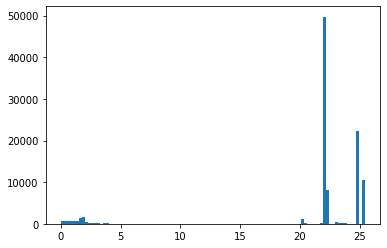

In [9]:
plt.hist(e_dep, bins=100)

In [58]:
def pixel_spectrum(hits_data, x_pixel, y_pixel):
    
    x_hits = np.zeros(len(df_hits))
    y_hits = np.zeros(len(df_hits))
    e_dep = np.zeros(len(df_hits))

    for i in range(len(df_hits)):
        x_hits[i] = float(df_hits[i:i+1]['HitX'])
        y_hits[i] = float(df_hits[i:i+1]['HitY'])
        e_dep[i] = float(df_hits[i:i+1]['EnDep'])
    
    x_dim = 130*(10**-4) # x dimension of each pixel in cm
    y_dim = 40*(10**-4) # x dimension of each pixel in cm
    x_num = 25 # Number of pixels in the x direction
    y_num = 400 # Number of pixels in the y direction
    half_width = x_dim*x_num/2
    half_height = y_dim*y_num/2

    x_edge = np.zeros(x_num+1)
    y_edge = np.zeros(y_num+1)

    for i in range(x_num+1):
        x_edge[i] = i*x_dim - half_width
    
    for i in range(y_num+1):
        y_edge[i] = i*y_dim - half_height
        
    index = []
    
    for i in range(len(x_hits)):
        if x_edge[x_pixel]<x_hits[i]<x_edge[x_pixel+1] and y_edge[y_pixel]<y_hits[i]<y_edge[y_pixel+1]:
            index = np.append(index, i)

    if len(index)==0:
        print("No pixels matching this description triggered.")
    else:
        print("There are %d total triggers." %(len(index)))
        e_hits = np.zeros(len(index))
        from matplotlib.pyplot import figure
        figure(num=None, figsize=(10, 6))
        for i in range(len(index)):
            e_hits[i] = e_dep[int(index[i])]
        plt.hist(e_hits)
        plt.title('Energy Spectrum for Pixel %d, %d' %(x_pixel, y_pixel))
        plt.xlabel('Energy (keV)')
        plt.ylabel('Counts')

There are 34 total triggers.


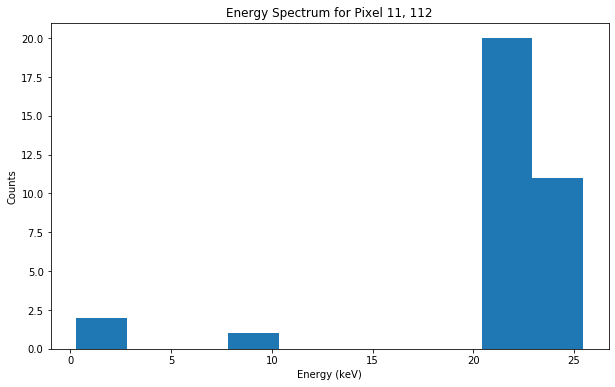

In [64]:
pixel_spectrum(df_hits,11,112)

In [63]:
print(H[112][11])

34.0


In [90]:
def hit_positions(hits_data, x_tick, y_tick, title):
    """
    
    hits_data: Pandas dataset. --> Contains the hit locations and energies.
               
    x_tick: float. --> Number of ticks you want for the x axis.
               
    y_tick: float. --> Number of ticks you want for the y axis.
               
    title: string. --> Title of the plot.
            
    
    """
    # Find the x and y position of each hit.
    x_hits = np.zeros(len(hits_data))
    y_hits = np.zeros(len(hits_data))

    for i in range(len(hits_data)):
        x_hits[i] = float(hits_data[i:i+1]['HitX'])
        y_hits[i] = float(hits_data[i:i+1]['HitY'])
    
    # Establish the physical parameters of the detector:
    x_dim = 130*(10**-4) # x dimension of each pixel in cm
    y_dim = 40*(10**-4) # x dimension of each pixel in cm
    x_num = 25 # Number of pixels in the x direction
    y_num = 400 # Number of pixels in the y direction

    # Plot
    from matplotlib.pyplot import figure
    figure(num=None, figsize=(14, 10))
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    ax.plot(x_hits,y_hits,'.',color='blue')
    # Arrange the ticks
    half_width = x_dim*x_num/2
    half_height = y_dim*y_num/2
    step_size_x = (x_dim*x_num)/x_tick
    step_size_y = (y_dim*y_num)/y_tick
    ax.set_xticks(np.arange(-half_width,half_width,step_size_x)+(x_dim/2))
    ax.set_yticks(np.arange(-half_height,half_height,step_size_y)+(y_dim/2))
    ax.set_xticklabels(np.arange(0,x_num+(x_num/x_tick),(x_num/x_tick),dtype=int))
    ax.set_yticklabels(np.arange(0,y_num+(y_num/y_tick),(y_num/y_tick),dtype=int))
    plt.xlim(-half_width, half_width)
    plt.ylim(-half_height, half_height)
    plt.xlabel('Pixel Number', size=12)
    plt.ylabel('Pixel Number', size=12)
    plt.title(title, size=14)
    
    return

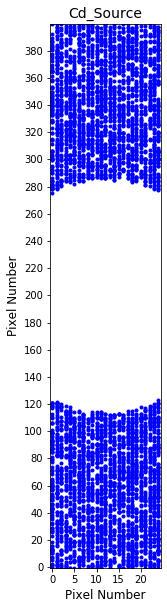

In [89]:
hit_positions(df_hits,5,20,'Cd_Source')

In [51]:
def hit_heatmap(hits_data, x_tick, y_tick, title):
    """
    
    hits_data: Pandas dataset. --> Contains the hit locations and energies.
               
    x_tick: float. --> Number of ticks you want for the x axis.
               
    y_tick: float. --> Number of ticks you want for the y axis.
               
    title: string. --> Title of the plot.
            
    
    """
    # Find the x and y position of each hit.
    x_hits = np.zeros(len(hits_data))
    y_hits = np.zeros(len(hits_data))

    for i in range(len(hits_data)):
        x_hits[i] = float(hits_data[i:i+1]['HitX'])
        y_hits[i] = float(hits_data[i:i+1]['HitY'])
    
    # Establish the physical parameters of the detector:
    x_dim = 130*(10**-4) # x dimension of each pixel in cm
    y_dim = 40*(10**-4) # x dimension of each pixel in cm
    x_num = 25 # Number of pixels in the x direction
    y_num = 400 # Number of pixels in the y direction

    # Plot
    from matplotlib.pyplot import figure
    figure(num=None, figsize=(14, 10))
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    half_width = x_dim*x_num/2
    half_height = y_dim*y_num/2
    step_size_x = (x_dim*x_num)/x_tick
    step_size_y = (y_dim*y_num)/y_tick
    # Plot the heatmap
    limits = [[-half_width,half_width],[-half_height,half_height]]
    x_edge = np.zeros(x_num+1)
    y_edge = np.zeros(y_num+1)
    
    for i in range(x_num+1):
        x_edge[i] = i*x_dim - half_width
    
    for i in range(y_num+1):
        y_edge[i] = i*y_dim - half_height
        
    H, xedges, yedges = np.histogram2d(x_hits, y_hits, bins=[x_edge,y_edge], range=limits)
    H = H.T 
    im = ax.imshow(H, interpolation='nearest', extent=[limits[0][0], limits[0][1], limits[1][0], limits[1][1]],cmap="magma")
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('Number of Hits', rotation=-90, va="bottom")
    # Arrange the ticks
    ax.set_xticks(np.arange(-half_width,half_width,step_size_x)+(x_dim/2))
    ax.set_yticks(np.arange(-half_height,half_height,step_size_y)+(y_dim/2))
    ax.set_xticklabels(np.arange(0,x_num+(x_num/x_tick),(x_num/x_tick),dtype=int))
    ax.set_yticklabels(np.arange(0,y_num+(y_num/y_tick),(y_num/y_tick),dtype=int))
    plt.xlim(-half_width, half_width)
    plt.ylim(-half_height, half_height)
    plt.xlabel('Pixel Number', size=12)
    plt.ylabel('Pixel Number', size=12)
    plt.title(title, size=14)
    
    return

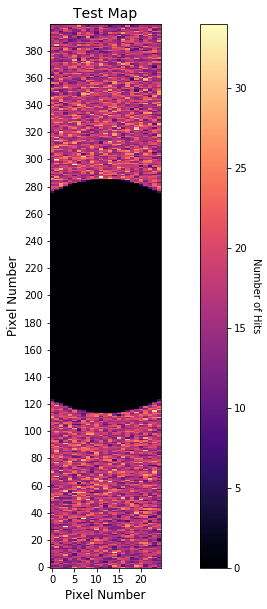

In [52]:
hit_heatmap(df_hits,5,20,'Test Map')

In [9]:
df_ia_params = pd.DataFrame(df_events['IA'])
#df_ia_params

## Histograms

Select the variables to plot:

Specify number of bins for the histogram

In [10]:
param = widgets.SelectMultiple(
    options=['TI', 'ED', 'EC', 'NS'],
    value=['ED'],
    description='Param.: ',
    disabled=False,
    layout=Layout(width='40%')
)
param

U2VsZWN0TXVsdGlwbGUoZGVzY3JpcHRpb249dSdQYXJhbS46ICcsIGluZGV4PSgxLCksIGxheW91dD1MYXlvdXQod2lkdGg9dSc0MCUnKSwgb3B0aW9ucz0oJ1RJJywgJ0VEJywgJ0VDJywgJ07igKY=


In [11]:
param.value

('ED',)

In [12]:
nbins = widgets.IntText(
    value=100,
    description='# on bins',
    disabled=False,
    layout=Layout(width='40%')
)
nbins

IntText(value=100, description=u'# on bins', layout=Layout(width=u'40%'))

In [ ]:
if len(param.value) > 1:
    fig, axs = plt.subplots(nrows=1, ncols=len(param.value), figsize=(21,4))
    for i, p in enumerate(param.value):
        axs[i].hist(np.array(df_events[p]), bins=nbins.value, alpha=0.8,
                   label='%i evts'%len(df_events[p]))
        axs[i].set_title(p, size=17)
        axs[i].set_xlabel('%s units'%p, size=15)
        axs[i].set_ylabel('Number of counts', size=15)
        axs[i].set_yscale('log')
        axs[i].legend(fontsize=15)
    plt.show()
else:
    plt.figure(figsize=(7,5))
    plt.hist(np.array(df_events[param.value[0]]), bins=nbins.value, alpha=0.8, 
             label='%i evts'%len(df_events[param.value[0]]))
    plt.title(param.value[0], size=17)
    plt.xlabel('%s units'%param.value[0], size=15)
    plt.ylabel('Number of counts', size=15)
    plt.yscale('log')
    plt.legend(fontsize=15)
    plt.show()

/opt/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


## Energy deposit in subsystems

In [21]:
df_hit = pd.DataFrame(hit_info)
df_hit


Select the subsystem(s) you want:

In [1]:
subsys = widgets.SelectMultiple(
    options=list(np.unique(df_hit['DetID'])),
    value=[1],
    description='Param: ',
    disabled=False,
    layout=Layout(width='30%', height='90%')
)
subsys

NameError: name 'widgets' is not defined

In [15]:
nbins2 = widgets.IntText(
    value=100,
    description='# on bins',
    disabled=False,
    layout=Layout(width='40%')
)
nbins2

IntText(value=100, description='# on bins', layout=Layout(width='40%'))

In [58]:
#df_hit_sub = df_hit.loc[df_hit['DetID'] == 2]
#df_hit_sub

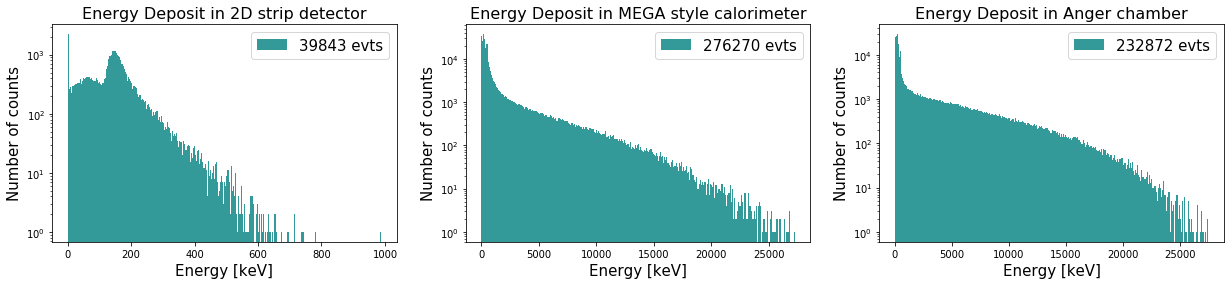

In [70]:
detIDdict = DetectorIDdict()
if len(subsys.value) > 1:
    fig, axs = plt.subplots(nrows=1, ncols=len(subsys.value), figsize=(21,4))
    for i, s in enumerate(subsys.value):
        df_hit_sub = df_hit.loc[df_hit['DetID'] == s]
        axs[i].hist(np.array(df_hit_sub['EnDep']), bins=nbins2.value, color='teal', alpha=0.8,
                    label='%i evts'%len(df_hit_sub))
        axs[i].set_title('Energy Deposit in %s'%detIDdict[str(s)], size=16)
        axs[i].set_xlabel('Energy [keV]', size=15)
        axs[i].set_ylabel('Number of counts', size=15)
        axs[i].set_yscale('log')
        axs[i].legend(fontsize=15)
    plt.show()
else:
    plt.figure(figsize=(7,5))
    df_hit_sub = df_hit.loc[df_hit['DetID'] == subsys.value[0]]
    plt.hist(np.array(df_hit_sub['EnDep']), bins=nbins2.value, color='teal', alpha=0.8,
            label='%i evts'%len(df_hit_sub))
    plt.title('Energy Deposit in subsystem %s'%detIDdict[str(subsys.value[0])], size=16)
    plt.xlabel('Energy [keV]', size=15)
    plt.ylabel('Number of counts', size=15)
    plt.yscale('log')
    plt.legend(fontsize=15)
    plt.show()

## Hit distribution along the axes in the MEGA style calorimeter

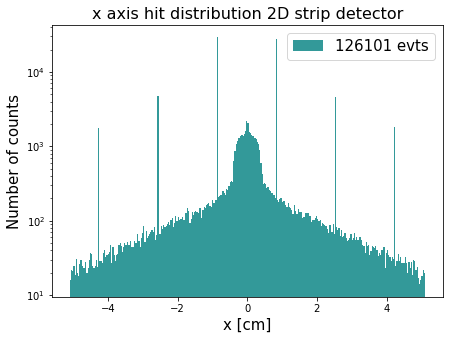

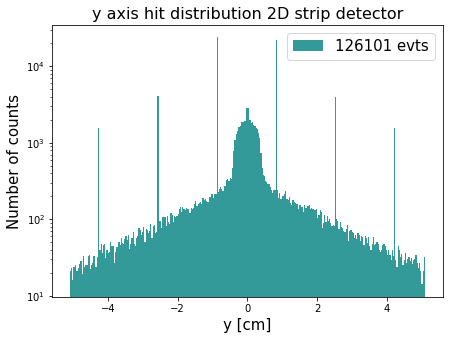

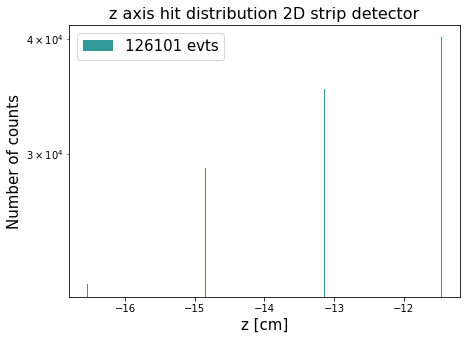

In [30]:
plt.figure(figsize=(7,5))
df_hit_sub = df_hit.loc[df_hit['DetID'] == 2]
plt.hist(np.array(df_hit_sub['HitX']), bins=nbins2.value, color='teal', alpha=0.8,
            label='%i evts'%len(df_hit_sub))
plt.title('x axis hit distribution %s'%detIDdict[str(subsys.value[0])], size=16)
plt.xlabel('x [cm]', size=15)
plt.ylabel('Number of counts', size=15)
plt.yscale('log')
plt.legend(fontsize=15)

plt.figure(figsize=(7,5))
df_hit_sub = df_hit.loc[df_hit['DetID'] == 2]
plt.hist(np.array(df_hit_sub['HitY']), bins=nbins2.value, color='teal', alpha=0.8,
            label='%i evts'%len(df_hit_sub))
plt.title('y axis hit distribution %s'%detIDdict[str(subsys.value[0])], size=16)
plt.xlabel('y [cm]', size=15)
plt.ylabel('Number of counts', size=15)
plt.yscale('log')
plt.legend(fontsize=15)

plt.figure(figsize=(7,5))
df_hit_sub = df_hit.loc[df_hit['DetID'] == 2]
plt.hist(np.array(df_hit_sub['HitZ']), bins=nbins2.value, color='teal', alpha=0.8,
            label='%i evts'%len(df_hit_sub))
plt.title('z axis hit distribution %s'%detIDdict[str(subsys.value[0])], size=16)
plt.xlabel('z [cm]', size=15)
plt.ylabel('Number of counts', size=15)
plt.yscale('log')
plt.legend(fontsize=15)

plt.show()

## Plot of the efficiency

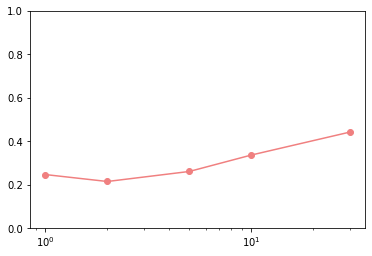

In [77]:
tot_sim_evt = 100000
trigg_evt = np.array([24578, 21389, 26002, 33557, 44086])
trigg_p100 = trigg_evt/tot_sim_evt
energy = np.array([1, 2, 5, 10, 30])

plt.figure()
plt.plot(energy, trigg_p100, 'o-', color='lightcoral')
plt.xscale('log')
plt.ylim(0, 1)
plt.
plt.xlabel('Energy [MeV]')
plt.show()